## Italian DCP Covid-19 Data Analysis (*Province-level*)
The COVID-19 pandemic has been a global health crisis that has affected millions of people across the world. Italy is one of the countries that was hit hard by the pandemic, and it has been at the forefront of efforts to track and control the spread of the virus.

Italy has been praised for its data-sharing setup ([*Naqvi A., 2021*](https://doi.org/10.1038/s41597-021-00950-7)), which is one of the best among European countries. The COVID-19 data used in this Jupyter Notebook is sourced from the [official GitHub page]((https://github.com/pcm-dpc/COVID-19)) of the Italian Civil Protection Department. The Civil Protection Department is a government agency in Italy responsible for handling emergency situations and protecting the population from natural disasters, accidents, and other hazards.

During the COVID-19 pandemic, the Civil Protection Department has played a crucial role in coordinating the national response and providing up-to-date information on the spread of the virus. As part of their efforts, they have made comprehensive data available on their official GitHub page, including data on COVID-19 cases, deaths, and hospitalizations at the province and regional levels. The regions defined in the data perfectly match NUTS 2021 definitions, which makes it easier for researchers to analyze the data.

As a Master's student, I am conducting an exploratory analysis of COVID-19 data both at a province and region level in Italy. This analysis will serve as the foundation stone of my Master's Thesis, which aims to investigate the impact of the pandemic on businesses' bankruptcies.
Through this analysis, I will explore the available COVID-19 data on the official GitHub page and filter it to focus on the Emilia-Romagna provinces. I will manipulate the data and produce visualizations that will aid in further analysis to understand the impact of the virus on the region's economy.

It is important to note that this analysis is exploratory in nature and aims to provide a starting point for further investigation. 

***
#### Table of Contents

- [Data Reading](#read)
- [Data Cleaning](#clean)
- [Data Manipulation](#manipulation)
- [Data Selection](#selection)
- [Visualization](#plots)

In [1]:
%run setup.ipynb

### Data Reading <a class='anchor' id='read'></a>
The code reads in a dataset of COVID-19 data at the province level in Italy, and stores it in a variable called `province`. The dataset contains some columns that are not needed, so those columns are dropped using the `drop()` function. The `data` column, which contains the date in a string format, is converted to a date data-type using the `pd.to_datetime` function. This allows the date to be manipulated and analyzed more easily using Python. A new column called `DateIndex` is created as a duplicate so that it can be used later as an index for the dataset.

In [2]:
# Constructs the full file path for the CSV file
path = os.path.join(DATA_PATH, "dpc-covid19-ita-province.csv")

  
try:
    with open(path, "r") as file:
        province = pd.read_csv(file)
        province.drop(columns=['note','codice_nuts_1','codice_nuts_2', 'codice_nuts_3'], inplace=True)
        province.data = province.data.apply(lambda L: L.partition('T')[0])
        province['data'] = pd.to_datetime(province['data'], format='%Y-%m-%d')
        province['DateIndex'] = province['data'] 
except FileNotFoundError:
    print("The specified CSV file was not found.")

display(province.tail())
province.info()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,DateIndex
159694,2023-02-16,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,453318,2023-02-16
159695,2023-02-16,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,528792,2023-02-16
159696,2023-02-16,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,119945,2023-02-16
159697,2023-02-16,ITA,5,Veneto,899,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,39252,2023-02-16
159698,2023-02-16,ITA,5,Veneto,999,In fase di definizione/aggiornamento,NaN,NaN,NaN,12423,2023-02-16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159699 entries, 0 to 159698
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   data                     159699 non-null  datetime64[ns]
 1   stato                    159699 non-null  object        
 2   codice_regione           159699 non-null  int64         
 3   denominazione_regione    159699 non-null  object        
 4   codice_provincia         159699 non-null  int64         
 5   denominazione_provincia  159699 non-null  object        
 6   sigla_provincia          115434 non-null  object        
 7   lat                      116523 non-null  float64       
 8   long                     116523 non-null  float64       
 9   totale_casi              159699 non-null  int64         
 10  DateIndex                159699 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 13.4+ MB


In [3]:
# Some extraneous provinces can be found in the set
province['denominazione_provincia'].unique()

array(["L'Aquila", 'Teramo', 'Pescara', 'Chieti',
       'In fase di definizione/aggiornamento', 'Potenza', 'Matera',
       'Cosenza', 'Catanzaro', 'Reggio di Calabria', 'Crotone',
       'Vibo Valentia', 'Caserta', 'Benevento', 'Napoli', 'Avellino',
       'Salerno', 'Piacenza', 'Parma', "Reggio nell'Emilia", 'Modena',
       'Bologna', 'Ferrara', 'Ravenna', 'Forlì-Cesena', 'Rimini', 'Udine',
       'Gorizia', 'Trieste', 'Pordenone', 'Viterbo', 'Rieti', 'Roma',
       'Latina', 'Frosinone', 'Imperia', 'Savona', 'Genova', 'La Spezia',
       'Varese', 'Como', 'Sondrio', 'Milano', 'Bergamo', 'Brescia',
       'Pavia', 'Cremona', 'Mantova', 'Lecco', 'Lodi',
       'Monza e della Brianza', 'Pesaro e Urbino', 'Ancona', 'Macerata',
       'Ascoli Piceno', 'Fermo', 'Campobasso', 'Isernia', 'Bolzano',
       'Trento', 'Torino', 'Vercelli', 'Novara', 'Cuneo', 'Asti',
       'Alessandria', 'Biella', 'Verbano-Cusio-Ossola', 'Foggia', 'Bari',
       'Taranto', 'Brindisi', 'Lecce', 'Barletta-Andr

### Data Cleaning <a class='anchor' id='clean'></a>

In the cleaning step of the analysis, two types of records that contain missing values were identified. The first type of rows was identified by the extraneous province denomination: each Region has two 'Provinces' named *'Out of Region/Autonomous Province'*, with the **province code 879 to 899**, useful to indicate data relating to subjects outside the Region or Autonomous Province and *'Under definition/update'*, with the **province code 979 to 999**, useful to indicate data not yet assigned to the Provinces. By discarding these rows, we can ensure that the dataset contains only reliable and relevant information for our analysis of COVID-19 data.

In [4]:
print('Missing Values Count for each Column in the Dataset')
display(province.isnull().sum(0))
province.query('sigla_provincia.isna()').head()

Missing Values Count for each Column in the Dataset


data                           0
stato                          0
codice_regione                 0
denominazione_regione          0
codice_provincia               0
denominazione_provincia        0
sigla_provincia            44265
lat                        43176
long                       43176
totale_casi                    0
DateIndex                      0
dtype: int64

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,DateIndex
4,2020-02-24,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,2020-02-24
7,2020-02-24,ITA,17,Basilicata,980,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,2020-02-24
13,2020-02-24,ITA,18,Calabria,982,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,2020-02-24
16,2020-02-24,ITA,15,Campania,63,Napoli,NaN,40.839566,14.25085,0,2020-02-24
19,2020-02-24,ITA,15,Campania,983,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,2020-02-24


In [5]:
# SAME ROWS FOR WHICH WE HAVE MISSING VALUES
display(province.query('denominazione_provincia == "In fase di definizione/aggiornamento"').head())
display(province.query('denominazione_provincia == "Fuori Regione / Provincia Autonoma"').head())
#EM_province.query('data == "2020-06-26"')

# WE REMOVE THOSE ROWS
province_clean = province.query('denominazione_provincia != "Fuori Regione / Provincia Autonoma" & denominazione_provincia != "In fase di definizione/aggiornamento"')

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,DateIndex
4,2020-02-24,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,2020-02-24
7,2020-02-24,ITA,17,Basilicata,980,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,2020-02-24
13,2020-02-24,ITA,18,Calabria,982,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,2020-02-24
19,2020-02-24,ITA,15,Campania,983,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,2020-02-24
29,2020-02-24,ITA,8,Emilia-Romagna,984,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,2020-02-24


,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,DateIndex
15620,2020-06-25,ITA,13,Abruzzo,879,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,25,2020-06-25
15624,2020-06-25,ITA,17,Basilicata,880,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,2,2020-06-25
15631,2020-06-25,ITA,18,Calabria,882,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,2,2020-06-25
15638,2020-06-25,ITA,15,Campania,883,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,0,2020-06-25
15649,2020-06-25,ITA,8,Emilia-Romagna,884,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,416,2020-06-25


As you can see, missing values can still be found in the `sigla_provincia` Province ID column. These all belongs to records referred to the Province of Naples, in the Campania region. It's worth noting that this phenomena is probably due to the fact that *the Province of Naples was abolished in 2014 and replaced with the Metropolitan City of Naples*. We decided to replace them with the commonly used (but obsolete) string **'NA'** using the `fillna()` function. This allows us to have a consistent value in the `sigla_provincia` column for all rows.

In [6]:
print('Missing Values Count for each Column in the Dataset')
display(province_clean.isnull().sum(0))

Missing Values Count for each Column in the Dataset


data                          0
stato                         0
codice_regione                0
denominazione_regione         0
codice_provincia              0
denominazione_provincia       0
sigla_provincia            1089
lat                           0
long                          0
totale_casi                   0
DateIndex                     0
dtype: int64

In [7]:
print('Province Names for Records with a Missing Province ID')
display(province_clean.query('sigla_provincia.isna()').denominazione_provincia)
display(province_clean.query('sigla_provincia.isna()').denominazione_provincia.unique())

import warnings
# Use the filterwarnings function to ignore the warning messages
warnings.filterwarnings('ignore') 

province_clean.fillna('NA', inplace=True)

# Reset the warning filter to its default state
warnings.filterwarnings('default')

Province Names for Records with a Missing Province ID


16        Napoli
144       Napoli
272       Napoli
400       Napoli
528       Napoli
           ...  
158973    Napoli
159122    Napoli
159271    Napoli
159420    Napoli
159569    Napoli
Name: denominazione_provincia, Length: 1089, dtype: object

array(['Napoli'], dtype=object)

In [8]:
# ALL MISSING WERE REMOVED
print('Missing Values Count for each Column in the Dataset')
display(province_clean.isnull().sum(0))

Missing Values Count for each Column in the Dataset


data                       0
stato                      0
codice_regione             0
denominazione_regione      0
codice_provincia           0
denominazione_provincia    0
sigla_provincia            0
lat                        0
long                       0
totale_casi                0
DateIndex                  0
dtype: int64

 The dataset is then reorganized using the `set_index` and `sort_index` functions. A hierarchical index with region name, province ID, and date was set for easy filtering and grouping of the data at different levels of granularity. For example, you can quickly filter data for a specific region, a specific province, or a specific date range. Additionally, sorting the index in ascending order by region, province, and date ensures that the data is organized and accessible in a consistent and efficient way.

In [9]:
# Use the filterwarnings function to ignore the warning messages
warnings.filterwarnings('ignore') 

province_clean.set_index(['denominazione_regione','sigla_provincia', 'DateIndex'], inplace=True)
province_clean.sort_index(level=[0,1,2], inplace=True)

# Reset the warning filter to its default state
warnings.filterwarnings('default')

province_clean.info()
province_clean

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 116523 entries, ('Abruzzo', 'AQ', Timestamp('2020-02-24 00:00:00')) to ('Veneto', 'VR', Timestamp('2023-02-16 00:00:00'))
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   data                     116523 non-null  datetime64[ns]
 1   stato                    116523 non-null  object        
 2   codice_regione           116523 non-null  int64         
 3   codice_provincia         116523 non-null  int64         
 4   denominazione_provincia  116523 non-null  object        
 5   lat                      116523 non-null  float64       
 6   long                     116523 non-null  float64       
 7   totale_casi              116523 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 7.6+ MB


data stato  \
denominazione_regione sigla_provincia DateIndex                     
Abruzzo               AQ              2020-02-24 2020-02-24   ITA   
                                      2020-02-25 2020-02-25   ITA   
                                      2020-02-26 2020-02-26   ITA   
                                      2020-02-27 2020-02-27   ITA   
                                      2020-02-28 2020-02-28   ITA   
...                                                     ...   ...   
Veneto                VR              2023-02-12 2023-02-12   ITA   
                                      2023-02-13 2023-02-13   ITA   
                                      2023-02-14 2023-02-14   ITA   
                                      2023-02-15 2023-02-15   ITA   
                                      2023-02-16 2023-02-16   ITA   

                                                  codice_regione  \
denominazione_regione sigla_provincia DateIndex                    
Abruzzo               AQ              2020-02-24              13   
                                      2020-02-25              13   
                                      2020-02-26              13   
                                      2020-02-27              13   
                                      2020-02-28              13   
...                                                          ...   
Veneto                VR              2023-02-12               5   
                                      2023-02-13               5   
                                      2023-02-14               5   
                                      2023-02-15               5   
                                      2023-02-16               5   

                                                  codice_provincia  \
denominazione_regione sigla_provincia DateIndex                      
Abruzzo               AQ              2020-02-24                66   
                                      2020-02-25                66   
                                      2020-02-26                66   
                                      2020-02-27                66   
                                      2020-02-28                66   
...                                                            ...   
Veneto                VR              2023-02-12                23   
                                      2023-02-13                23   
                                      2023-02-14                23   
                                      2023-02-15                23   
                                      2023-02-16                23   

                                                 denominazione_provincia  \
denominazione_regione sigla_provincia DateIndex                            
Abruzzo               AQ              2020-02-24                L'Aquila   
                                      2020-02-25                L'Aquila   
                                      2020-02-26                L'Aquila   
                                      2020-02-27                L'Aquila   
                                      2020-02-28                L'Aquila   
...                                                                  ...   
Veneto                VR              2023-02-12                  Verona   
                                      2023-02-13                  Verona   
                                      2023-02-14                  Verona   
                                      2023-02-15                  Verona   
                                      2023-02-16                  Verona   

                                                        lat       long  \
denominazione_regione sigla_provincia DateIndex                          
Abruzzo               AQ              2020-02-24  42.351222  13.398438   
                                      2020-02-25  42.351222  13.398438   
                                      2020-02-26  42.351222  13.398438   
  

## Data Manipulation <a class='anchor' id='manipulation'></a>

In the data manipulation step, several new features were created in the `province_clean` dataset. These features were created to provide additional information that will be useful for the analysis.

The first new feature created is the `totale_casi_100k` column. This column calculates the number of total COVID-19 cases per 100,000 people for each province in the Emilia-Romagna region. This is important because **it provides a way to compare the number of cases between provinces, despite differences in population size.**
Populations for the years 2020 to 2022 were retrieved from the official database of the Italian National Institute of Statistics ([ISTAT](http://dati.istat.it/Index.aspx?DataSetCode=DCIS_POPRES1#)) and averaged over the same period for each available area of the italian territory.

The second new feature is the `days_from_lock` column, which calculates the number of days between each data point and the date of the first lockdown in Italy, which occurred on *March 9th, 2020*. This is particularly important for the survival models in my thesis, as **it provides a measure of the time that each business in a specific province has been exposed to restrictions since the first lockdown in Italy.**

The final step was to sort the dataset by region, province, and date. This ensures that the data is organized in a logical way that will be useful for further analysis. Overall, these new features provide additional information that will be useful for the upcoming analysis of the impact of COVID-19 in the Emilia-Romagna region.

In [10]:
pops = pd.read_csv(f'{DATA_PATH}/istat_pop_media.csv', index_col=0)
display(pops.head()) 
pop_provinces = pops[pops.index.isin(province['denominazione_provincia'].unique())]
pop_provinces.head()

,mean_population
Italia,59302611.0
Nord-ovest,15906568.0
Piemonte,4280837.0
Torino,2219507.0
Vercelli,167352.0


,mean_population
Torino,2219507.0
Vercelli,167352.0
Novara,363274.0
Cuneo,582689.0
Asti,209895.0


In [11]:
# Use the filterwarnings function to ignore the warning messages
warnings.filterwarnings('ignore') 

# EUROSTAT 2021 POPULATION ON JANUARY1ST

province_clean['totale_casi_100k'] = np.NAN

#for prov, pop in pop_provinces.items():
#    EM_province_clean['totale_casi_100k'][EM_province_clean['denominazione_provincia'] == prov] = np.round((EM_province_clean['totale_casi'] / pop) * 100000, 2)

for prov in province_clean.denominazione_provincia.unique():
    province_clean['totale_casi_100k'][province_clean['denominazione_provincia'] == prov] = np.round((province_clean['totale_casi'] / pop_provinces.loc[prov].values) * 100000, 0)

province_clean.insert(1, "days_from_lock", province_clean['data'] - pd.to_datetime('2020-03-09'))
province_clean.sort_index(level=[0,1], inplace=True)

# Reset the warning filter to its default state
warnings.filterwarnings('default')

display(province_clean.info())
province_clean.tail()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 116523 entries, ('Abruzzo', 'AQ', Timestamp('2020-02-24 00:00:00')) to ('Veneto', 'VR', Timestamp('2023-02-16 00:00:00'))
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   data                     116523 non-null  datetime64[ns] 
 1   days_from_lock           116523 non-null  timedelta64[ns]
 2   stato                    116523 non-null  object         
 3   codice_regione           116523 non-null  int64          
 4   codice_provincia         116523 non-null  int64          
 5   denominazione_provincia  116523 non-null  object         
 6   lat                      116523 non-null  float64        
 7   long                     116523 non-null  float64        
 8   totale_casi              116523 non-null  int64          
 9   totale_casi_100k         116523 non-null  float64        
dtypes: datetime64[ns](1), float64(3), 

None

data days_from_lock  \
denominazione_regione sigla_provincia DateIndex                              
Veneto                VR              2023-02-12 2023-02-12      1070 days   
                                      2023-02-13 2023-02-13      1071 days   
                                      2023-02-14 2023-02-14      1072 days   
                                      2023-02-15 2023-02-15      1073 days   
                                      2023-02-16 2023-02-16      1074 days   

                                                 stato  codice_regione  \
denominazione_regione sigla_provincia DateIndex                          
Veneto                VR              2023-02-12   ITA               5   
                                      2023-02-13   ITA               5   
                                      2023-02-14   ITA               5   
                                      2023-02-15   ITA               5   
                                      2023-02-16   ITA               5   

                                                  codice_provincia  \
denominazione_regione sigla_provincia DateIndex                      
Veneto                VR              2023-02-12                23   
                                      2023-02-13                23   
                                      2023-02-14                23   
                                      2023-02-15                23   
                                      2023-02-16                23   

                                                 denominazione_provincia  \
denominazione_regione sigla_provincia DateIndex                            
Veneto                VR              2023-02-12                  Verona   
                                      2023-02-13                  Verona   
                                      2023-02-14                  Verona   
                                      2023-02-15                  Verona   
                                      2023-02-16                  Verona   

                                                       lat       long  \
denominazione_regione sigla_provincia DateIndex                         
Veneto                VR              2023-02-12  45.43839  10.993527   
                                      2023-02-13  45.43839  10.993527   
                                      2023-02-14  45.43839  10.993527   
                                      2023-02-15  45.43839  10.993527   
                                      2023-02-16  45.43839  10.993527   

                                                  totale_casi  \
denominazione_regione sigla_provincia DateIndex                 
Veneto                VR              2023-02-12       471016   
                                      2023-02-13       471030   
                                      2023-02-14       471135   
                                      2023-02-15       471211   
                                      2023-02-16       471292   

                                                  totale_casi_100k  
denominazione_regione sigla_provincia DateIndex                     
Veneto                VR              2023-02-12           50892.0  
                                      2023-02-13           50893.0  
                                      2023-02-14           50905.0  
                                      2023-02-15           50913.0  
                                      2023-02-16           50922.0

Next, new CSV files are created to store the cleaned and filtered data using the `to_csv()` function. Files are saved in the `data` folder of the working directory, with the filenames:
-  `province_clean.csv` containing the full dataset after the cleaning and data manipulation steps; 
-  `ER_province.csv` consisting in the Emilia-Romagna provinces filtered from the previous set; 
-  `NORD_province.csv` consisting in all the North and Centre-North provinces of Italy as filtered from the cleaned dataset.
  This will allow the final result to be easily accessed and analyzed in the future. Overall, these steps ensure that data is specific to the region of interest and ready for further analysis and querying.

In [12]:
file_path = f'{RESULTS_PATH}/province_clean.csv'
with open(file_path, "w") as f:
    province_clean.to_csv(f)

In [13]:
ER_province = province_clean.query('codice_regione == 8')
file_path = f'{RESULTS_PATH}/ER_province.csv'
with open(file_path, "w") as f:
    ER_province.to_csv(f)

In [14]:
reg_selection = [i for i in range(12)]
NORD_province = province_clean.query('codice_regione.isin(@reg_selection)')
file_path = f'{RESULTS_PATH}/NORD_province.csv'
with open(file_path, "w") as f:
    NORD_province.to_csv(f)

## Plots <a class='anchor' id='plots'></a>

In [34]:
# Create a GroupBy object to iterate over
grouped = ER_province.groupby('denominazione_provincia')

# Create a copy of the turbo color map
custom_cmap = mpl.colormaps.get_cmap('turbo').copy()

# Modify the last color to be a lighter purple
purple = (0.5, 0.0, 0.5, 1.0) # (R, G, B, A)
light_purple = tuple(0.7 * x + 0.3 for x in purple[:3]) + (1.0,)
custom_cmap.colors[-1] = light_purple

# Create a color map for each province
colors = custom_cmap(np.linspace(0, 1, len(grouped)))

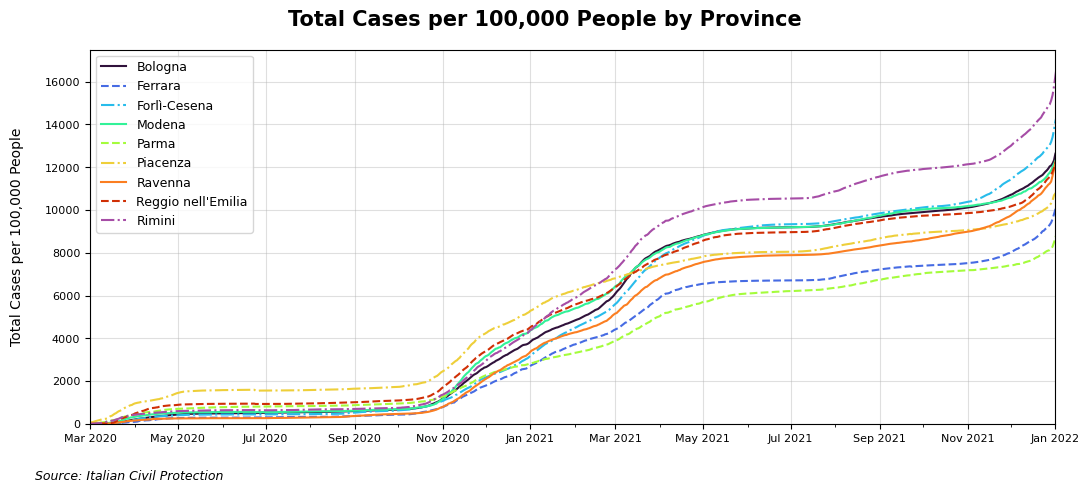

In [35]:
# plot each province's time-series data on the same plot
fig, ax = plt.subplots(figsize=(11, 5))
for i, (name, group) in enumerate(grouped):
    # Use the remainder operator to cycle through a list of 3 line styles
    ls = ['-', '--', '-.'][i % 3]
    group.plot(x='data', y='totale_casi_100k', label=name, ax=ax, color=colors[i], ls=ls)

# set the x-axis tick frequency to show every 3 months
date_fmt = DateFormatter('%b %Y')
locator = AutoDateLocator()
locator.intervald[3] = 3  # show every 3 months
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)
ax.tick_params(axis='x', rotation=0, labelsize=8) # set font size to 8
ax.tick_params(axis='y', rotation=0, labelsize=8) # set font size to 8

# hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelsize=0)
ax.set_xlim(('Mar 2020', 'Jan 2022'))
ax.set_ylim((0,17500))

# add plot labels and legend
plt.xlabel('', labelpad=15)
plt.ylabel('Total Cases per 100,000 People', labelpad=15, fontsize=10)
plt.suptitle('Total Cases per 100,000 People by Province', fontsize=15, fontweight='bold')
plt.grid(alpha=0.4)
plt.legend(markerscale=100, prop={'size': 9})

# Add the data source as a footnote
ax.text(0.04, -0.15, "Source: Italian Civil Protection", ha="center", fontsize=9, transform=ax.transAxes, fontstyle="italic")

save_fig('totalcases_province')

#### Map Chart
First, we need to import the required libraries, which are GeoPandas and Matplotlib. GeoPandas is a library that allows us to work with geospatial data, while Matplotlib is a well known data visualization library.

Next, we need to read in a shapefile that contains the geographic boundaries of the regions or provinces we want to plot on the map. In this case, we use the gpd.read_file() function from GeoPandas to read in the shapefile, which was downloaded directly from [ISTAT](https://www.istat.it/it/archivio/222527). We then select the provinces of interest by querying the `'COD_REG'` column using the `query()` method.

In [36]:
# Reading the shapefile previously downloaded and selection the provinces of interest
map_df = gpd.read_file(f'{DATA_PATH}/Limiti01012023_g/ProvCM01012023_g/ProvCM01012023_g_WGS84.shp').query('COD_REG.isin(@reg_selection)')

# Check data type so we can see that this is not a normal dataframe, but a GEOdataframe
# Since a distinction is made for the Metropolitan Cities, we should rely solely on the COD_PROV
display(map_df.head())

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,6.828104e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,6.898501e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,1.508923e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4..."


Once we have the shapefile, we extract the data we want to plot on the map, which in this case is the total number of COVID-19 cases per 100,000 people in each province. We get this data from a pandas DataFrame called `NORD_province`, which we filter to get the latest record available and select only the columns we need. We then group the data by province and join it with the shapefile DataFrame using the `'COD_PROV'` and `'codice_provincia'` columns, respectively.

Next, we set the `'highlight'` column to True for the provinces of Emilia-Romagna, so that we can highlight it on the map.

In [37]:
# Select data for the map
date = np.max(NORD_province.data)
data_formap = NORD_province.xs(date, level=2).groupby(level=[0, 1]).apply(lambda x: x)[['codice_provincia','totale_casi_100k']]
data_formap.reset_index(inplace=True)

# Join the data with the map GeoDataFrame
merged = map_df.set_index('COD_PROV').join(data_formap.set_index('codice_provincia')['totale_casi_100k'])

# Add a column to highlight the Emilia-Romagna provinces
merged['highlight'] = merged['COD_REG'] == 8
merged.head()  

,COD_RIP,COD_REG,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Area,geometry,totale_casi_100k,highlight
COD_PROV,,,,,,,,,,,,,
1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,6.828104e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",41053.0,False
2,1,1,0,2,Vercelli,-,Vercelli,VC,Provincia,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5...",36816.0,False
3,1,1,0,3,Novara,-,Novara,NO,Provincia,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5...",36040.0,False
4,1,1,0,4,Cuneo,-,Cuneo,CN,Provincia,6.898501e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928...",36026.0,False
5,1,1,0,5,Asti,-,Asti,AT,Provincia,1.508923e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4...",38126.0,False


Finally, we create a Matplotlib figure and axes object, and use the `plot()` method of the GeoDataFrame to plot the map. The plot() method is used to plot the map with the totale_casi_100k variable using the 'Blues' color map. This plot is added to the ax object created earlier. We also use the `plot()` method again to highlight the province of Emilia-Romagna in red. This plot is also added to the ax object. We remove the axis, add a title and a data source annotation, and create a colorbar using the `colorbar()` function from Matplotlib.

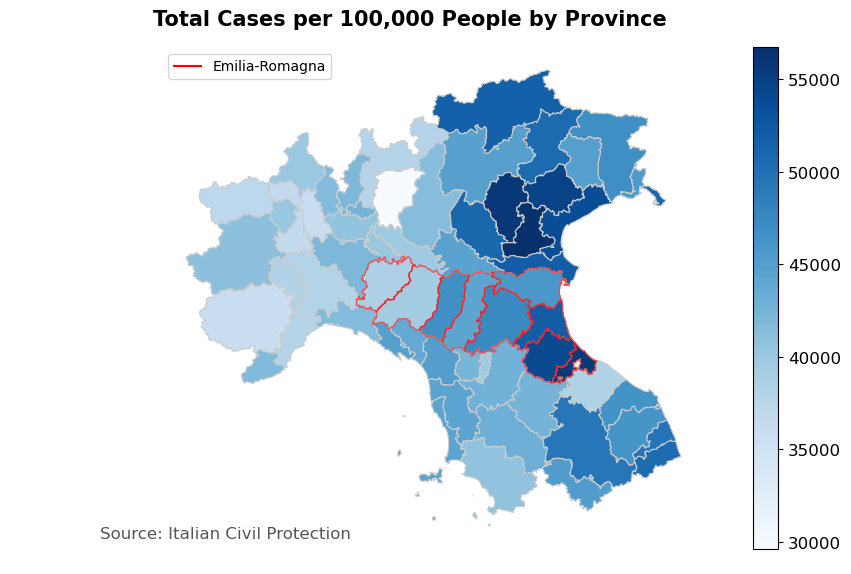

In [38]:
# Set a variable that will call whatever column we want to visualize on the map
variable = 'totale_casi_100k'

# Set the range for the choropleth
vmin, vmax = (merged.iloc[:,-2].min(), merged.iloc[:,-2].max())

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
merged[merged['highlight']].plot(ax=ax, edgecolor='red', facecolor='none', alpha=0.6)

# Remove the axis
ax.axis('off')

# Add a title and subtitle
plt.suptitle('Total Cases per 100,000 People by Province', fontsize=15, fontweight='bold')

# Add an annotation for the data source
ax.annotate('Source: Italian Civil Protection', xy=(0.1, .08), xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Add a legend with a red line labeled 'Emilia-Romagna'
ax.plot([], [], color='red', label='Emilia-Romagna')
ax.legend(loc='upper left')

# Create a colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbar = fig.colorbar(sm, ax=ax)

save_fig('province_map')


***